<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Basic statistics for headline lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


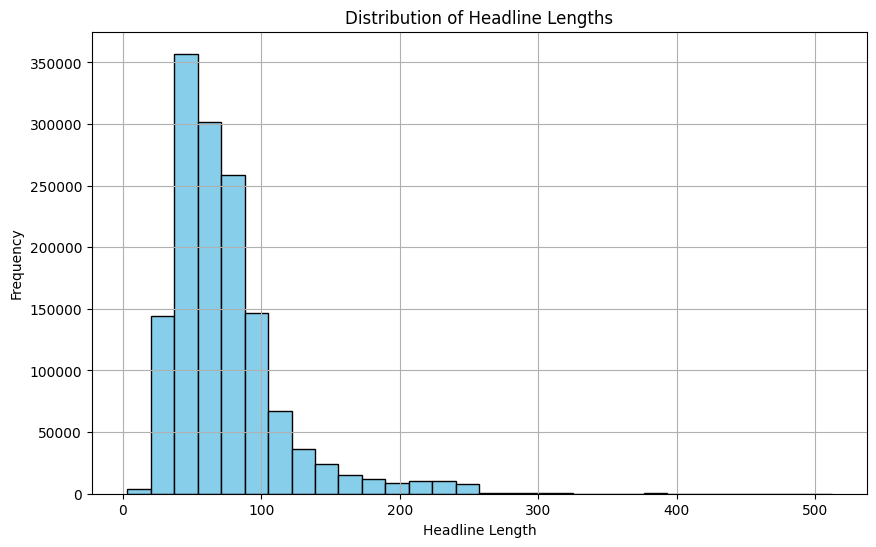

Number of articles per publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


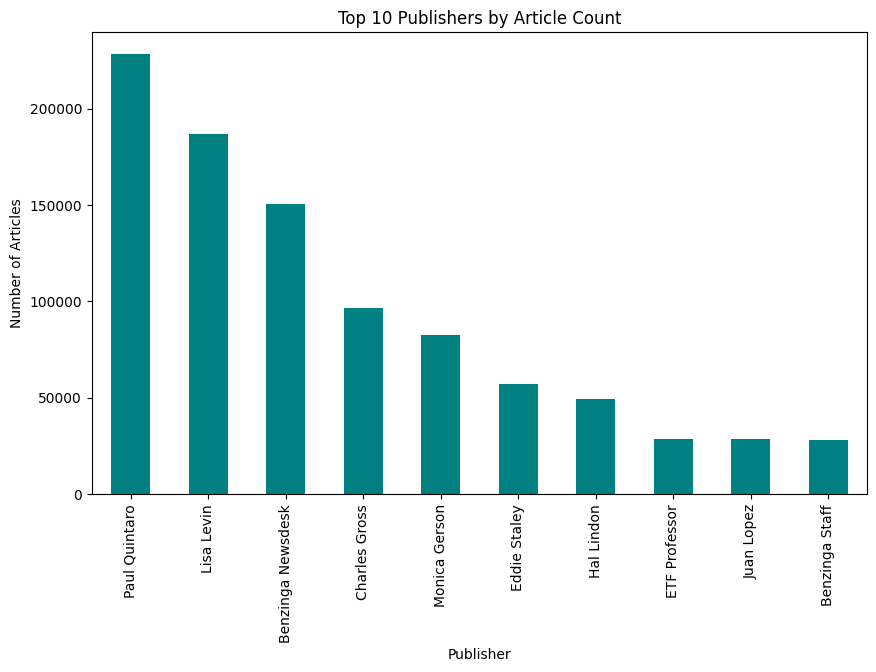

C:\Users\MMM\AppData\Local\Temp\ipykernel_12344\809932730.py:56: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['publication_date'].dt.to_period('M')


Number of articles published per month:
year_month
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


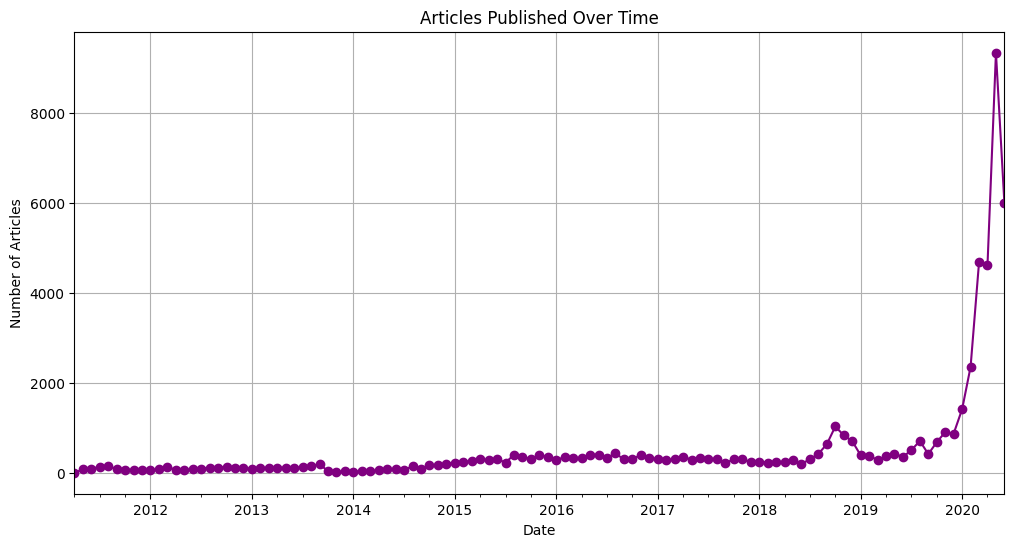

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the raw analyst ratings data
file_path = 'raw_analyst_ratings.csv'  # Update this to the correct path if needed
data = pd.read_csv(file_path)

# Display the first few rows to understand the data structure
data.head()

# Check column names and data types to make sure we know what we're working with
print(data.info())

# Print the column names to inspect them
print(data.columns)

# Assuming your dataset has columns like 'headline', 'publisher', 'publication_date'
# If the column names are different, adjust accordingly.

# 1. Calculate basic statistics for headline lengths (textual lengths)
data['headline_length'] = data['headline'].apply(len)
print("Basic statistics for headline lengths:")
print(data['headline_length'].describe())

# Plot distribution of headline lengths
plt.figure(figsize=(10,6))
data['headline_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

# 2. Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()
print("Number of articles per publisher:")
print(publisher_counts)

# Plot top 10 publishers by number of articles
plt.figure(figsize=(10,6))
publisher_counts.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

# 3. Analyze publication dates to observe trends over time
# Convert publication_date to datetime if it's not already in datetime format
data['publication_date'] = pd.to_datetime(data['date'], errors='coerce')


# Drop rows with invalid dates
data = data.dropna(subset=['publication_date'])

# Extract year and month for trend analysis
data['year_month'] = data['publication_date'].dt.to_period('M')

# Count articles per month
articles_per_month = data['year_month'].value_counts().sort_index()

print("Number of articles published per month:")
print(articles_per_month)

# Plot publication trends over time
plt.figure(figsize=(12,6))
articles_per_month.plot(kind='line', color='purple', marker='o')
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [14]:
%pip install textblob


In [15]:
%pip install gensim


In [16]:
%pip install nltk


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in c:\users\mmm\appdata\local\programs\python\python312\lib\site-packages (3.9.1)



In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MMM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MMM\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True